<a href="https://colab.research.google.com/github/murtazav/Audio-Classification-of-Indian-Languages/blob/master/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import matplotlib.pyplot as plt
import pylab
import librosa
import librosa.display
import numpy as np

In [0]:
import io
import tarfile

import PIL

import boto3

from fastai.vision import *

In [0]:
mls = os.listdir("/content/drive/My Drive/sound/Tamil_Sample")

In [0]:
for i in range(100):
  y, sr = librosa.load("/content/drive/My Drive/sound/Tamil_Sample/"+mls[i], sr=None)
  # Let's make and display a mel-scaled power (energy-squared) spectrogram
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

  # Convert to log scale (dB). We'll use the peak power (max) as reference.
  log_S = librosa.power_to_db(S, ref=np.max)
  pylab.axis('off') # no axis
  pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
  # Display the spectrogram on a mel scale
  # sample rate and hop length parameters are used to render the time axis
  librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
  pylab.savefig("/content/drive/My Drive/Specto/Tamil/"+str(i)+".jpg", bbox_inches=None, pad_inches=0)
  pylab.close()

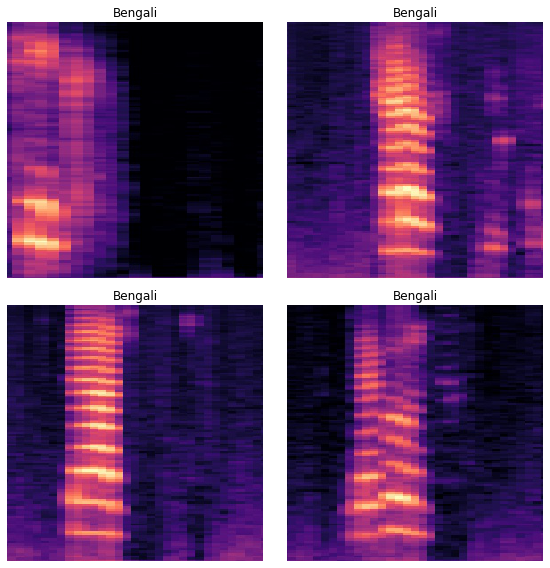

In [0]:
np.random.seed(42)
path = "/content/drive/My Drive/Specto"
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=None, size=288, bs=4)
data.normalize(imagenet_stats)
data.show_batch(rows=5, figsize=(8,8))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


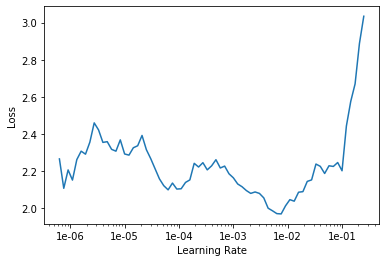

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.625055,0.630553,0.283333,00:02
1,0.733750,0.628415,0.250000,00:02
2,0.696494,0.778322,0.350000,00:02
3,0.878670,0.543437,0.216667,00:02
4,0.770137,0.585529,0.250000,00:02
5,0.760969,0.565902,0.216667,00:02
6,0.624062,0.552032,0.233333,00:02
7,0.613736,0.677162,0.250000,00:02
8,0.658767,0.621378,0.233333,00:02
9,0.596275,0.604529,0.216667,00:02


In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


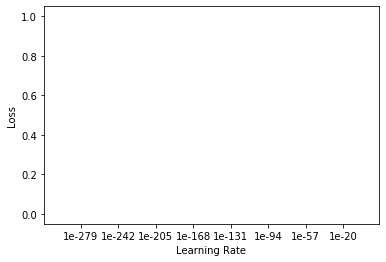

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.442450,0.589034,0.250000,00:03
1,0.507614,0.559362,0.216667,00:03
2,0.487676,0.511454,0.200000,00:03
3,0.490897,0.551947,0.216667,00:03
4,0.502097,0.501395,0.183333,00:03
5,0.476667,0.538320,0.200000,00:03
6,0.615969,0.548451,0.183333,00:03
7,0.483557,0.566809,0.216667,00:03
8,0.396564,0.497458,0.166667,00:03
9,0.437098,0.454565,0.166667,00:03


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

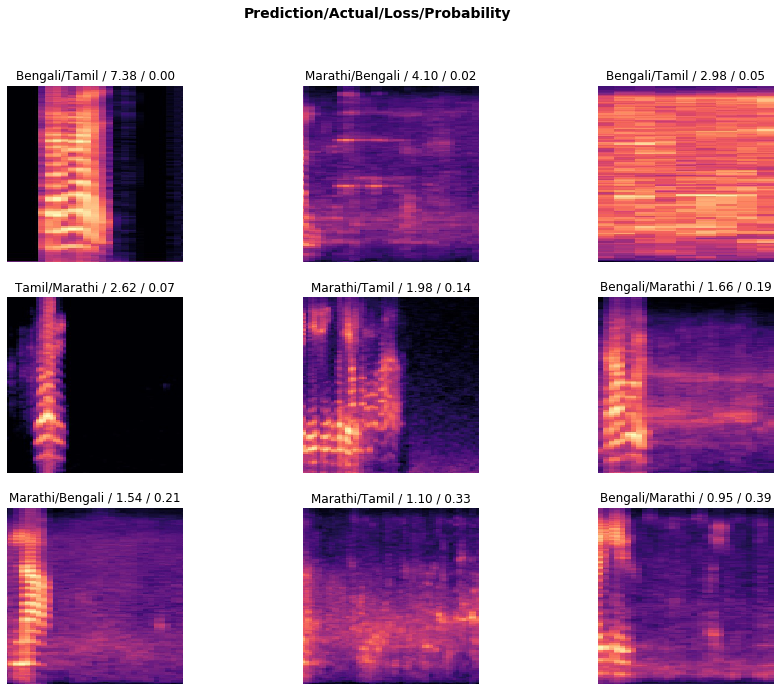

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

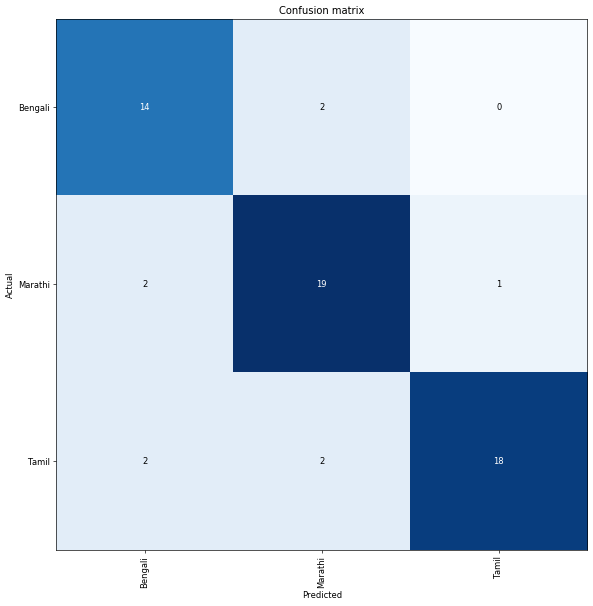

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [0]:
learn.save('model---4-r34-288')